In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import csv
import xml.etree.ElementTree as ET
import glob


In [3]:
%matplotlib inline

In [4]:
"""
Set of output functions for evaluated objects (curves, surfaces, volumes)
Formats supported are csv and vtk 
NOTE: Some of those functions are purely prototypes and not functional
"""

"""
VTK output function - Not Working
"""
def write_vtk(data):
    line = "<VTKFile type=\"PolyData\">\n"
    line += "<PolyData>\n"
    line += "<Piece NumberOfPoints=\"" + str(int(np.size(data[:, :, :])/3)) + "\" NumberOfVerts=\"" + str(int(np.size(data[:, :, :])/3)) + "\" NumberOfLines=\"0\" NumberOfStrips=\"0\" NumberOfPolys=\"0\">\n"
    line +=  "<PointData>\n"
    line += "<DataArray type=\"Int32\" Name=\"";
    line += "Stuff";
    line += "\" format=\"ascii\">\n";
    
    for i in range(np.size(data)):
        line += " "
        line += "0"
    line +=  "\n";
    line += "</DataArray>\n";
    line +=  "</PointData>\n"
    line += "<Points>\n"
    
    line +="<DataArray type=\"Float64\" Name=\"";
    line += "Points"
    line += "\" NumberOfComponents=\"3\" format=\"ascii\">\n";
    d = 0
    for x in data:
        for y in x:
            for t in y:
                line += " " + str(t[0]) + " " + str(t[1]) + " " + str(t[2])
                d += 1
    print(d)
    print(np.size(data)/3)
           
    line += "\n";
    line += "</DataArray>\n";
    
    line += "</Points>\n";
    line += "<Verts>\n";
    line += "<DataArray type=\"Int32\" Name=\"connectivity\" format=\"ascii\">\n";
    
    for i in range(int(np.size(data[:, :, :])/3)):
        line += " ";
        line += str(i)
    line += "\n";
    line += "</DataArray>\n";
    line += "<DataArray type=\"Int32\" Name=\"offsets\" format=\"ascii\">\n";
    
    for i in range(int(np.size(data[:, :, :])/3)):
        line += " ";
        line += str(i + 1)
    line += "\n";
    line += "</DataArray>\n";
    line += "</Verts>\n";
    line += "</Piece>\n";
    line += "</PolyData>\n";
    line += "</VTKFile>\n";
    
    dat = open("data.vtp", "w")
    dat.write(line)
    dat.close()

"""
VTU output function - Not Working
"""
def write_vtu(data):
    sh = data.shape
    num = (sh[0]-2)*(sh[1]-1)*sh[2] + sh[2]*2 
    line = "<VTKFile type=\"UnstructuredGrid\">\n"
    line += "<UnstructuredGrid>\n"
    line += "<Piece NumberOfPoints=\"" + str(num) + "\" NumberOfCells=\"" + str((sh[0]-1) * (sh[1]-1) * (sh[2]-1)) + "\">\n"
    line +=  "<PointData>\n"
    line += "<DataArray type=\"Int32\" Name=\"";
    line += "Stuff";
    line += "\" format=\"ascii\">\n";
    
    for i in range(num):
        line += " "
        line += "0"
    line +=  "\n";
    line += "</DataArray>\n";
    line +=  "</PointData>\n"
    
    line +=  "<CellData>\n"
    line += "<DataArray type=\"Int32\" Name=\"";
    line += "Stuff";
    line += "\" format=\"ascii\">\n";
    for i in range((sh[0]-1) * (sh[1]-1) * (sh[2]-1)):
        line += " "
        line += "0"
    line +=  "\n";
    line += "</DataArray>\n";
    line += "</CellData>\n"
    
    line += "<Points>\n"
    
    line +="<DataArray type=\"Float64\" Name=\"";
    line += "Points"
    line += "\" NumberOfComponents=\"3\" format=\"ascii\">\n";
    d = 0
    i = 0
    j = 0
    k = 0
    for k in range(sh[2]):
        line += " " + str(data[0, 0, k, 0])+" "+str(data[0,0,k, 1])+" "+str(data[0,0,k, 2])
        d += 1
    
            
    for x in data[1:sh[2]-1]:
        for y in x[:9]:
            for t in y:
                line += " " + str(t[0]) + " " + str(t[1]) + " " + str(t[2])
                d += 1
    
    for k in range(sh[2]):
        line += " "+str(data[sh[0]-1, sh[1]-1, k, 0])+" "+str(data[sh[0]-1,sh[1]-1,k, 1])+" "+str(data[sh[0]-1,sh[1]-1,k, 2])
    print(d)
    print(np.size(data)/3)
           
    line += "\n";
    line += "</DataArray>\n";
    line += "</Points>\n";
    
    line += "<Cells>\n";
    line += "<DataArray type=\"Int32\" Name=\"connectivity\" format=\"ascii\">\n";
    
    # 5, 9, 3
    n = 0
    i = 0
    j = 0
    k = 0
    while j < (sh[1]-2):
        k = 0
        while k < (sh[2]-1):
            down = 5
            right = 9  
            thic = 3
            ind = k + thic*j + sh[2]
            print(ind)
            test = " "+str(k)+" "+str(ind)+" "+str(ind + thic * right)+" "+str(k+1)+" "+str(ind+1)+" "+str(ind+1 + thic * right)
                #print(test)
            line += test
            k += 1
            n += 1
                #print(k)
        j += 1
        if j == sh[2]-1:
            line += " "+str(k)
        
    while i < (sh[0]-2):
        j = 0
        while j < (sh[1]-2):
            k = 0
            while k < (sh[2]-1):
                down = 5
                right = 9  
                thic = 3
                ind = k + thic*j + i * (right * thic) + sh[2]
                #print(ind)
                test = " "+str(ind)+" "+str(ind + thic)+" "+str(ind + thic * right + thic)+" " +str(ind + right*thic)+" "+str(ind+1)+" "+str(ind+1 + thic)+" "+str(ind+1 + thic * right + thic)+" "+str(ind+1 + right*thic)
                #print(test)
                line += test
                k += 1
                n += 1
                #print(k)
            j += 1
        i += 1
    line += "\n";
    line += "</DataArray>\n";
    line += "<DataArray type=\"Int32\" Name=\"offsets\" format=\"ascii\">\n";
    
    for i in range((sh[0]-1) * (sh[1]-1) * (sh[2]-1)):
        line += " ";
        line += str(i + 1)
    line += "\n";
    line += "</DataArray>\n";
    
    line += "<DataArray type=\"UInt8\" Name=\"types\" format=\"ascii\">\n";
    
    for i in range((sh[0]-1) * (sh[1]-1) * (sh[2]-1)):
        line += " ";
        line += "12"
    line += "\n";
    line += "</DataArray>\n";
    line += "</Cells>\n";
    
    
    line += "</Piece>\n";
    line += "</UnstructuredGrid>\n";
    line += "</VTKFile>\n";
    
    dat = open("data.vtu", "w")
    dat.write(line)
    dat.close()

"""
CSV output function - Working
"""
def write_csv(data):
    with open("datas.csv", 'w', newline='') as csvfile:  
    # creating a csv writer object  
        csvwriter = csv.writer(csvfile)  
        fields = ['x', 'y', 'z']
    # writing the fields  
        csvwriter.writerow(fields)  
        #for vol in data:
        for sur in data:
            for s in sur:
                for d in s:
                    csvwriter.writerow(d) 

"""
VTK output function - Working
"""
def test_data(data):
    sh = data.shape
    num = sh[0]*(sh[1]-2)*(sh[2]-1)+(sh[0]*2)
    line = "# vtk DataFile Version 2.0\n"
    line += "Unstructured Grid Example\n"
    line += "ASCII\n"
    line += "DATASET UNSTRUCTURED_GRID\n"
    line += "POINTS " + str(num) + " float\n"
    print(sh)
    ye = 0
    dat = []
    for idx, val in enumerate(data):
        for idy, x in enumerate(val):
            for idj, y in enumerate(x):
                if idj == sh[2]-1:
                    break
                line += str(y[0]) + "  " + str(y[1]) + "  " + str(y[2]) + "   "
                dat.append(np.array(y[3:]))
                ye += 1
                if idy == 0 or idy == sh[1]-1:
                    break
    cpts = (7*2*(sh[2]-1) + 9*(sh[1]-3)*(sh[2]-1))*(sh[0]-1)
    dat = np.array(dat)
    line += "\n\n";
    line += "CELLS " + str((sh[2]-1)*(sh[1]-1)*(sh[0]-1)) + " " +  str(cpts)  +"\n"
    d = 0
    print((sh[2]-1)*(sh[1]-1)+2)
    for k in range(sh[0]-1):
        d = k * ((sh[1]-2)*(sh[2]-1)+2) 
        for j in range(sh[1]-1):
            b = 0
            if j == 0 or j == sh[1]-2:
                npts = 6
            else:
                npts = 8
            if j == 0:
                b = 1
            for i in range(sh[2]-1):
                line += str(npts) + " "
                if i == sh[2]-2:
                    z = 1
                else:
                    z = 0
                if j == 0:
                    string = str(d)+" "+str(d+((i+1)%(sh[2])))+" "+str(d+((i+2)%(sh[2]))+z)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+1)%(sh[2])))+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+2)%(sh[2]))+z)
                elif j == sh[1]-2:
                    string = str(d+sh[2]-1)+" "+str(d+((i+1)%(sh[2]))-1)+" "+str(d+((i+2)%(sh[2]))+z-1)+" "+str(d+(sh[2]-1)*(sh[1]-2)+2+sh[2]-1)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+1)%(sh[2]))-1)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+2)%(sh[2]))+z-1)
                else:
                    string = str(d+i)+" "+str(d+((i+1)%(sh[2]-1)))+" "+str(d+(sh[2]-1)+((i+1)%(sh[2]-1)))+" "+str(d+(sh[2]-1)+i)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+i)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+1)%(sh[2]-1)))+" "+str(d+(sh[2]-1)+(sh[1]-2)*(sh[2]-1)+2+((i+1)%(sh[2]-1)))+" "+str(d+(sh[2]-1)+(sh[1]-2)*(sh[2]-1)+2+i)
                    b += 1
                line += string+" "
                line += "\n"
            d += b

           
            
    line += "\n"   
    line += "CELL_TYPES " + str((sh[2]-1)*(sh[1]-1)*(sh[0]-1)) + "\n"
    for k in range(sh[0]-1):
        for i in range((sh[1]-1)):
            for j in range(sh[2]-1):
                if i == 0 or i == sh[1]-2:
                    string = str(13)
                else:
                    string = str(12)
                line += string+"\n"
    
    line += "\n"
    #dat = np.reshape(dat, (sh[0]*(sh[1]-2)*(sh[2]-1)+(sh[0]*2), 1), 'C')
    print(dat)
    line += "POINT_DATA " + str(num) + "\n"
    line += "SCALARS scalars float 1\n"
    line += "LOOKUP_TABLE default\n"
    for i in range(num):
        
        line += str(dat[i][0])
        line += " "
    line += "\n"
    
    dat = open("test.vtk", "w")
    dat.write(line)
    dat.close()
    
"""
VTK output function - Not working
"""
def print_data(data):
    line = "# vtk DataFile Version 2.0\n"
    line += "Unstructured Grid Example\n"
    line += "ASCII\n"
    line += "DATASET UNSTRUCTURED_GRID\n"
    line += "POINTS " + str(int(np.size(data[:, :, :])/3)) + " float\n"
    for x in data:
        for y in x:
            for t in y:
                line += str(t[0]) + " " + str(t[1]) + " " + str(t[2]) + "\n"
    sh = data.shape
    #print(str(int(np.size(data[:, :, :])/3)))
    line += "\n";
    line += "CELLS " + str((sh[0]-1) * (sh[1]-1) * (sh[2]-1)) + " " +  str((sh[0]-1)*(sh[1]-1)*(sh[2]-1)*8)  +"\n"
    #print((sh[0]-1)*(sh[1]-1)*(sh[2]-1)*8)
    #print(str((sh[0]-1) * (sh[1]-1) * (sh[2]-1)))
    # 5, 9, 3
    n = 0
    i = 0
    j = 0
    k = 0
    while i < 4:
        j = 0
        while j < 8:
            k = 0
            while k < 2:
                down = 5
                right = 9  
                thic = 3
                ind = k + thic*j + i * (right * thic)
                #print(ind)
                test = str(8)+" "+str(ind)+" "+str(ind + thic)+" "+str(ind + thic * right + thic)+" " +str(ind + right*thic)+" "+str(ind+1)+" "+str(ind+1 + thic)+" "+str(ind+1 + thic * right + thic)+" "+str(ind+1 + right*thic)+"\n"
                #print(test)
                line += test
                k += 1
                n += 1
                #print(k)
            j += 1
        i += 1
                #print(line)
    print(n)
    
    line += "CELL_TYPES " + str((sh[0]-1) * (sh[1]-1) * (sh[2]-1)) + "\n"
    for i in range(n):
        line += "12\n"
    
    line += "POINT_DATA " + str(int(np.size(data[:, :, :])/3)) + "\n"
    line += "SCALARS scalars float 1\n"
    line += "LOOKUP_TABLE default\n"
    for i in range(int(np.size(data[:, :, :])/3)):
        
        line += "0."
        line += " "
    line += "\n"
    
    dat = open("test.vtk", "w")
    dat.write(line)
    dat.close()
    

In [60]:
"""
Jupyter cell that outputs the evaluated volume to csv 
"""

print(vol.shape)
#array[np.abs(array) < eps] = 0
#vol[np.abs(vol) < 0.0001] = 0.0
#test_data(vol)
write_csv(vol)

(3, 6, 11, 3)


In [5]:
"""
Helper functions
"""

def fspan(p, u, U):
    m = len(U) - 1
    n = m - p - 1
    if (u == U[n+1]):
        return n
    low = p
    high = n+1
    mid = int(math.floor((low + high)/2))
    while (u < U[mid] or u >= U[mid+1]):
        if (u < U[mid]):
            high = mid
        else:
            low = mid
        mid = int(math.floor((low+high)/2))
    return mid

def basisFun(i, u, p, U):
    N = np.zeros(p+1)
    N[0] = 1.
    left = np.zeros(p+1)
    right = np.zeros(p+1)
    #for j in range(0, p+1):
        
    #print(i)
    for j in range(1, p+1):
        left[j] = u-U[i+1-j]
        right[j] = U[i+j]-u
        saved = 0.
        for r in range(j):
            temp = N[r]/(right[r+1]+left[j-r])
            N[r] = saved + right[r+1]*temp
            saved = left[j-r]*temp
        #print(saved)
        N[j] = saved
    return N

def basisDer(i, u, p, n, U):
    ders = np.zeros((n+1, p+1))
    ndu = np.zeros((p+1, p+1))
    ndu[0, 0] = 1.
    left = np.zeros(p+1)
    right = np.zeros(p+1)
    for j in range(1, p+1):
        left[j] = u-U[i+1-j]
        right[j] = U[i+j]-u
        saved = 0.
        for r in range(j):
            ndu[j, r] = right[r+1] + left[j-r]
            temp = ndu[r, j-1]/ndu[j, r]
            
            ndu[r, j] = saved+right[r+1]*temp
            saved = left[j-r]*temp
        #print(saved)
        ndu[j][j] = saved

    a = np.zeros((2, p+1))
    for j in range(p+1):
        s1 = 0
        s2 = 1
        a[0, 0] = 1.
        for k in range(1, n+1):
            d = 0.
            rk = r-k
            pk = p-k
            if (r >= k):
                a[s2, 0] = a[s1, 0]/ndu[pk+1, rk]
                d = a[s2, 0] * ndu[rk, pk]
            if (rk >= -1):
                j1 = 1
            else:
                j1 = -rk
            if (r-1 <= pk):
                j2 = k-1
            else:
                j2 = p-r
            j = j1
            while j <= j2:
                a[s2, j] = (a[s1, j] - a[s1, j-1])/ndu[pk+1, rk+j]
                d += a[s2, j] * ndu[rk+j, pk]
                j += 1
            if (r <= pk):
                a[s2, k] = - a[s1, k-1]/ndu[pk+1, r]
                d += a[s2, k] * ndu[r, pk]
            ders[k, r] = d
            j = s1
            s1 = s2
            s2 = j
    r = p
    for k in range(1, n+1):
        for j in range(p+1):
            ders[k, j] = ders[k, j] * r
        r = r * (p-k)
        
    return ders
        

def pntCur(Pw, p, U, u):
    uspan = fspan(p, u, U)
    Nu = basisFun(uspan, u, p, U)
    print(uspan)
    #print(Nu)
    Cw = [0., 0., 0., 0.]
    for i in range(p+1):
        Cw = Cw + Nu[i]*Pw[uspan-p+i]
    C = Cw[:3]/Cw[3]
    return np.array(C)


def pntBSP(Cs, p, q, U, V, u, v):
    n = len(U)
    m = len(V)
    uspan = fspan(p, u, U)
    #print(uspan)
    Nu = basisFun(uspan, u, p, U)
    vspan = fspan(q, v, V)
    Nv = basisFun(vspan, v, q, V)
    #print(uspan)
    uind = uspan-p
    #print(uind)
    S = [0, 0, 0, 0]
    #print(uind)
    
    for l in range(q+1):
        temp = [0., 0., 0., 0.]
        vind = vspan-q+l
        #print(vind)
        for k in range(p+1):
            temp = temp + Nu[k]*Cs[uind+k, vind]
        S = S + Nv[l]*temp
    #print("uind: ", uind+k, " vind: ", vind)
    
    S = S[:3]/S[3]
    return np.array(S)

def pntBVL(Cs, p, q, d, U, V, B, u, v, w):
    n = len(U)
    m = len(V)
    uspan = fspan(p, u, U)
    #print(uspan)
    Nu = basisFun(uspan, u, p, U)
    vspan = fspan(q, v, V)
    Nv = basisFun(vspan, v, q, V)
    wspan = fspan(d, w, B)
    Nw = basisFun(wspan, w, d, B)
    #print(Nu)
    #print(Nw)
    #print("wspan: ", wspan)
    #print(uspan)
    #print(uind)
    S = [0., 0., 0., 0.]
    #print(uind)
    
    for l in range(q+1):
        temp = [0., 0., 0., 0.]
        #print(vind)
        for k in range(p+1):
            t = [0., 0., 0., 0.]
            
            for r in range(d+1):
                #print(wspan-d+r)
                t = t + Nw[r] * Cs[uspan-p+k, vspan-q+l, wspan-d+r]
                
            temp = temp + Nu[k]*t
        S = S + Nv[l]*temp
    #print("uind: ", uind+k, " vind: ", vind)
    Ss = S[:3]
    #Ss = np.append(Ss, S[4])
    
    S = Ss/S[3]
    #print(S)
    return np.array(S)
    
    #print(Nu)
    
def get_intersect(p0, t0, p2, t2):
    """ 
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    #s = np.vstack([a1,a2,b1,b2])        # s for stacked
    #h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    #l1 = np.cross(h[0], h[1])           # get first line
    #l2 = np.cross(h[2], h[3])           # get second line
    #x, y, z = np.cross(l1, l2)          # point of intersection
    #if z == 0:                          # lines are parallel
    #    return [float('inf'), float('inf')]
    m0 = 0
    if np.isclose(t0[0], 0):
        if t0[1] < 0:
            m0 = -1000000
        else:
            m0 = 1000000
    else:
        m0 = t0[1]/t0[0]
    m2 = 0
    if np.isclose(t2[0], 0):
        if t2[1] < 0:
            m2 = -1000000
        else:
            m2 = 1000000
    else:
        m2 = t2[1]/t2[0]
        
    
    #print(m0)
    #print(m2)
    #print()
    b0 = p0[1] - m0 * p0[0]
    b2 = p2[1] - m2 * p2[0]

    
    xi = (b0-b2) / (m2-m0)
    yi = m0 * xi + b0


    return [xi, yi]

In [6]:
"""
def sphere(O, r, wf, wh):
    Ps = []
    theta = 0
    phi = 0
    ws = [] #np.array([[w for w in wf]] * len(wh))
    #print(ws)
    #ws[1::2, 1::2] = 0.5
    for i in range(len(wf)):
        phi = 0
        P = []
        wm = np.cos(45 * np.pi/180)
        w = []
        #print("w: ", w)
        #print("length: ", len(w))
        for j in range(len(wh)):
            if i%2 == 0:
                w.append(wh[j])
            else:
                w.append(wh[j])
            #print(w)
            P.append([r*np.cos(theta*np.pi/180)*np.sin(phi*np.pi/180) + O[0], r*np.sin(theta*np.pi/180)*np.sin(phi*np.pi/180) + O[1], r*np.cos(phi*np.pi/180) + O[2]])
            #print(wh[j])
            #print(wh[j]*wf[i])
            #w.append(wf[i])
            phi = phi + 45
        #print()
        theta = theta + 45
        #print(wh)
        #print(P)
        #print(Pwh)
        Ps.append(np.array(P))
        ws.append(np.array(w))

    
    return np.array(Ps), np.array(ws)
"""

"""
Define a sphere with given parametric curves
"""
def sphere(wf, wh, Pf, Ph):

    wm = np.cos(45 * np.pi/180.)
    Ps = np.zeros((len(Pf), len(Ph), 3))
    ws = np.zeros((len(Pf), len(Ph)))
    #print(Ps)
    #print(ws)
    #print(ws)
    #ws[1::2, 1::2] = 0.5
   
    for i in range(len(Ph)):
            
        Ps[0, i] = np.array([Ph[i, 0], Ph[i, 1], Ph[i, 2]]) *  wh[i]
            #print(Ps)
            #print(Ps.shape)
        ws[0, i] = wh[i]
            #theta = 0.
        for j in range(1, len(Pf)):
          
             #print(aspect)
                #r = Pt[k]
            if i == (len(Ph)-1) or i == 0:
                ws[j, i] = wh[i]# * wf[j]
                Ps[j, i] = np.array([Ph[i, 0], Ph[i, 0], Ph[i, 2]]) * ws[j, i]
            else:
                if j % 2 == 0:
                    ws[j, i] = wh[i]
                else:
                    ws[j,i] = wh[i] * wf[j]
                Ps[j, i] = np.array([Pf[j, 0], Pf[j, 1], Ph[i, 2]]) * ws[j, i]            
    
    return np.array(Ps), ws
    

In [55]:

"""
Define a circular parametric curve 
"""
def NURBSCircle(O, X, Y, r, ths, the):
    if (the < ths): 
        the = 360. + the
    theta = the-ths
    nacrs = 0
    if (theta <= 90.):
        narcs = 1
        U = np.zeros(6 + 2*(narcs-1))
    else:
        if (theta <= 180.):
            narcs = 2
            U = np.zeros(6 + 2*(narcs-1))
            #print(len(U))
            U[3] = U[4] = 0.5
        else:
            if (theta <= 270.):
                narcs = 3
                U = np.zeros(6 + 2*(narcs-1))
                U[3] = U[4] = 1./3.
                U[5] = U[6] = 2./3.
            else:
                narcs = 4
                U = np.zeros(6 + 2*(narcs-1))
                U[3] = U[4] = 0.25
                U[5] = U[6] = 0.5
                U[7] = U[8] = 0.75
    j = 2*narcs+1
    
    for i in range(0, 3):
        U[i] = 0.
        U[i+j] = 1.
    dtheta = theta/narcs
    
    
    n = 2 * narcs
    Pw = []
    ws = []
    w1 = math.cos(dtheta/2. * np.pi/180.)
    ws.append(1)
    P0 = O + r*math.cos(ths*np.pi/180.)*X + r*math.sin(ths*np.pi/180.)*Y
    
    T0 = -math.sin(ths*np.pi/180.)*X + math.cos(ths*np.pi/180.)*Y
    Pw.append(P0)
    index = 0
    angle = ths
    for i in range(1, narcs+1):
    
        angle = angle + dtheta
        P2 = O + r*math.cos(angle*np.pi/180.)*X + r*math.sin(angle*np.pi/180.)*Y
        #print(P2)

        T2 = -math.sin(angle*np.pi/180.)*X + math.cos(angle*np.pi/180)*Y
        if (X[0] == 1):
            #print("hehe")
            P1 = np.array(get_intersect(P0[:2], T0[:2], P2[:2], T2[:2]) + [0.])
        if (X[2] == 1):
            #print("hahahaa")
            pp = get_intersect([P0[0], P0[2]], [T0[0], T0[2]], [P2[0], P2[2]], [T2[0], T2[2]])
            P1 = np.array([pp[0]] + [0.] + [pp[1]])
        #print(P1)
        ws.append(w1)
        Pw.append(P1)
        ws.append(1)
        Pw.append(P2)
        if (i < narcs):
            P0 = P2
            T0 = T2
    
    return n, np.array(U), np.array(Pw), np.array(ws)


"""
Define a spherical shell based on parametric curves
"""
def Cell(wf, wh, wt, Pf, Ph, Pt):
    Ps = np.array([[[[0., 0., 0.] for t in Pt]] * len(Ph)] * len(Pf))
    ws = np.zeros((len(Pf), len(Ph),len(Pt)))
    print(ws.shape)
    #print(Pt[1]/Pf[0, 0])
    #print(Pt[1]/Pf[0, 0] * Pf)
    #print(Pf)
    #print(Ph)
    #print(Pt)
    theta = 0
    for k in range(len(Pt)):
        #phi = 0.
        for i in range(len(Ph)):
            aspect = abs(Pt[k]/Pf[0, 0])
            Ps[0, i, k] = np.array([Ph[i, 0], Ph[i, 1], Ph[i, 2]]) * aspect * wh[i]
            #print(Ps)
            #print(Ps.shape)
            ws[0, i, k] = wh[i]
            #theta = 0.
            for j in range(1, len(Pf)):
                
                #print(aspect)
                #r = Pt[k]
                if i == (len(Ph)-1) or i == 0:
                    ws[j, i, k] = wh[i]# * wf[j]
                    Ps[j, i, k] = np.array([Ph[i, 0], Ph[i, 0], Ph[i, 2]]) * aspect * ws[j, i, k]
                else:
                    if j % 2 == 0:
                        ws[j, i, k] = wh[i]
                    else:
                        ws[j,i,k] = wh[i] * wf[j]
                    Ps[j, i, k] = np.array([Pf[j, 0], Pf[j, 1], Ph[i, 2]]) * aspect * ws[j, i, k]
                #Ps[j, i, k] = np.array([r*np.cos(theta*np.pi/180)*np.sin(phi*np.pi/180), r*np.sin(theta*np.pi/180)*np.sin(phi*np.pi/180), r*np.cos(phi*np.pi/180)])
                #theta += 45.
           # phi += 45.
    #print(Ps)         
    return np.array(Ps), ws

#def cellTest(Pw, wt, Pt):
    
"""
Refine a parametric curve
"""
def refCur(n, p, U, Pw, X, r):
    Ubar = np.zeros(len(U)+r+1)
    Qw = np.zeros((len(Pw)+r+1, 4))

    m = n+p+1
    a = fspan(p, X[0], U)
    b = fspan(p, X[r], U) + 1

    print("New points: ",(r+p+b-a-1))
    for j in range(a-p+1):
        Qw[j] = Pw[j]
    for j in range(b-1, n+1):
        Qw[j+r+1] = Pw[j]
        
    for j in range(a+1):
        Ubar[j] = U[j]
    for j in range(b+p, m+1):
        Ubar[j+r+1] = U[j]
    
    i = b+p-1
    k = b+p+r
    j = r

    while j >= 0:
        
        while (X[j] <= U[i] and i > a):
            Qw[k-p-1] = Pw[i-p-1]
            Ubar[k] = U[i]
            k = k-1
            i = i-1

        Qw[k-p-1] = Qw[k-p]
        for l in range(1, p+1):
            ind = k-p+l
            alfa = Ubar[k+l]-X[j]
            if (abs(alfa) == 0.0):
                Qw[ind-1] = Qw[ind]
            else:
                alfa = alfa/(Ubar[k+l]-U[i-p+l])
                Qw[ind-1] = alfa*Qw[ind-1] + (1.0 - alfa)*Qw[ind]
        
        Ubar[k] = X[j]
        k = k-1
        j = j-1
        
    return Qw, Ubar

"""
Refine a parametric surface
"""
def refSur(n, p, U, m, q, V, Pw, X, r, dire):
    Ubar = np.zeros(len(U)+r+1)
    Vbar = np.zeros(len(V)+r+1)
    sh = Pw.shape
    if (dire):

        Qw = np.zeros((sh[0], sh[1]+r+1, 4))
        print(Ubar)
        print(U)

        z = n+p+1
        a = fspan(p, X[0], U)
        b = fspan(p, X[r], U) + 1
        print("a: ", a)
        print("b: ", b)
        

        for j in range(a+1):
            Ubar[j] = U[j]
        for j in range(b+p, z+1):
            print(j)
            Ubar[j+r+1] = U[j]
            
        #print(Ubar)
        
        for row in range(0, m+1):
            for j in range(a-p+1):
                Qw[row, j] = Pw[row, j]
            for j in range(b-1, n+1):
                Qw[row, j+r+1] = Pw[row, j]
        
        
        
        j = r
        i = b+p-1
        k = b+p+r
        while j >= 0:
            while (X[j] <= U[i] and i > a):
                for row in range(0, m+1):
                    Qw[row, k-p-1] = Pw[row ,i-p-1]
                Ubar[k] = U[i]
                k = k-1
                i = i-1

            for row in range(0, m+1):
                Qw[row, k-p-1] = Qw[row, k-p]
            for l in range(1, p+1):
                ind = k-p+l
                alfa = Ubar[k+l]-X[j]
                if (abs(alfa) == 0.0):
                    for row in range(0, m+1):
                        Qw[row, ind-1] = Qw[row, ind]
                else:
                    alfa = alfa/(Ubar[k+l]-U[i-p+l])
                    for row in range(0, m+1):
                        Qw[row, ind-1] = alfa*Qw[row, ind-1] + (1.0 - alfa)*Qw[row, ind]
        
            Ubar[k] = X[j]
            k = k-1
            j = j-1
        print(Qw)
        
    else:
        Qw = np.zeros((sh[0], sh[1]+r+1, 4))

        z = n+p+1
        a = fspan(p, X[0], U)
        b = fspan(p, X[r], U) + 1

        for j in range(a+1):
            Ubar[j] = U[j]
        for j in range(b+p, z+1):
            Ubar[j+r+1] = U[j]
        
        print("New points: ",(r+p+b-a-1))
        for row in range(0, m+1):
            for j in range(a-p+1):
                print(j)
                print(Qw[row, j])
                print(Pw[row, j])
            for j in range(b-1, n+1):
                Qw[row, j+r+1] = Pw[row, j]
        
        
        j = r
        i = b+p-1
        k = b+p+r
        while j >= 0:
            while (X[j] <= U[i] and i > a):
                for row in range(0, m+1):
                    Qw[row, k-p-1] = Pw[row ,i-p-1]
                Ubar[k] = U[i]
                k = k-1
                i = i-1

            for row in range(0, m+1):
                Qw[row, k-p-1] = Qw[row, k-p]
            for l in range(1, p+1):
                ind = k-p+l
                alfa = Ubar[k+l]-X[j]
                if (abs(alfa) == 0.0):
                    for row in range(0, m+1):
                        Qw[row, ind-1] = Qw[row, ind]
                else:
                    alfa = alfa/(Ubar[k+l]-U[i-p+l])
                    for row in range(0, m+1):
                        Qw[row, ind-1] = alfa*Qw[row, ind-1] + (1.0 - alfa)*Qw[row, ind]
        
            Ubar[k] = X[j]
            k = k-1
            j = j-1
        
    return Qw, Ubar, V

In [56]:
def fanchors(U, p):
    if p % 2 is 0:
        t = []
        for i in range(len(U)-p-1):
            ind = int(i+p/2)
            #print(i+p/2)
            t.append(1/2*(U[ind] + U[ind+1]))
    else:
        t = []
        for i in range(len(U)-p-1):
            ind = int(i+(p+1)/2)
            t.append(U[ind])
        
    return t

def findex(n, p):
    s = []
    for i in range(n-p-1):
        s.append(i+(p+1)/2)
    return s


def oneBasisFun(i, u, n, U):
    p = len(U) - 2
    if (i == 0 and u == U[0]) or (i == n-1 and u == U[p+1]):
        Nip = 1.0
        return Nip
    if (u < U[0] or u >= U[p+1]):
        Nip = 0.0
        return Nip
    N = np.zeros(p+1)
    for j in range(p+1):
        if (u >= U[j] and u < U[j+1]):
            N[j] = 1.0
        else:
            N[j] = 0.0

    for k in range(1, p+2):
        if (N[0] == 0.0):
            saved = 0.0
        else:
            
            saved = ((u-U[0])*N[0])/(U[k]-U[0])

        for j in range(p-k+1):
            Uleft = U[j+1]
            Uright = U[j+k+1]

            if (N[j+1] == 0.0):
                N[j] = saved
                saved = 0.0
            else:

                temp = N[j+1]/(Uright-Uleft)
                N[j] = saved+(Uright-u)*temp
                saved = (u-Uleft)*temp

    Nip = N[0]
    return Nip
    
    
def evalCurv(P, u, U, betas):
    n = len(P)
    
    Cw = [0.0, 0.0, 0.0, 0.0]
    for i in range(n):
        #print(U[i])
        Nip = oneBasisFun(i, u, n, U[i])
        #print("Nip: ", Nip)
        Cw = Cw + betas[i] * Nip * P[i]
        
    print(Cw)
    C = Cw[:3]/Cw[3]
    
    
    return C

def evalSurf(P, u, v, U):
    sh = P.shape
    n = sh[0] # full 
    m = sh[1] # half
    
    #print(n)
    #print(m)
    #print(U[0][0])
    Sw = [0.0, 0.0, 0.0, 0.0]
    for r in range(n*m):
        i = int(math.floor(r/m))
        j = int(r%m)
        #print("i: ", i)
        #print("j: ", j)
        Nip = oneBasisFun(i, u, n, U[0][i])
        Niq = oneBasisFun(j, v, m, U[1][j])
        
        #print(int(math.floor(i/n)))
        #print("Nip: ", Nip)
        #print("Niq: ", Niq)
        #print()
        Sw = Sw + Nip * Niq * P[i, j]
        
    #print(Niq)
    #print(Nip)
    #print(Sw)
    S = Sw[:3]/Sw[3]
    #print(S)
    
    return np.array(S)
    

def makeTspline(sf, Uf, p, sh, Uh, q):
    
    loch = []
    locf = []
    for f in sf:
        lockf = np.zeros(p+2) 
        indf = math.floor(f) - 1    
            #print("indf: ", indf)
    
        for i in range(int(p/2 + 1)):
                # left
            if (indf-i <= 0):
                lockf[int(p/2)-i] = Uf[0]
            else:
                lockf[int(p/2)-i] = Uf[indf-i+p-1]
                # right
            end = len(Uf)-1
                #print(indf+i >= end)
            if (indf+i >= end):
                lockf[int(p/2)+i+1] = Uf[end]
            else:
                lockf[int(p/2)+i+1] = Uf[p+indf+i]
            #print("anchor: ", tf[indf])
            #print(lockf)
                
            #print(lockf)
        locf.append(lockf)
    
    for h in sh:
        lockh = np.zeros(q+2)
        
        
        if q % 2 == 0:
            indh = math.floor(h) - 1
            for i in range(int(q/2 + 1)):
                # left
                if (indh-i <= 0):
                    lockh[int(q/2)-i] = Uh[0]
                else:
                    lockh[int(q/2)-i] = Uh[indh-i+q-1]
                # right
                end = len(Uh)-1
                #print(indh)
                if (indh+i >= end):
                    lockh[int(q/2)+i+1] = Uh[end]
                else:
                    lockh[int(q/2)+i+1] = Uh[q+indh+i]
        else:
            indh = int(h)
            print(indh)
            lockh[q-1] = Uh[indh]
            for i in range(int(q-1)):
                if (indh-i <= 0):
                    lockh[q-2-i] = Uh[0]
                else:
                    lockh[q-2-i] = Uh[indh-i-1]
                
                end = len(Uh)-1
                if (indh+i+1 >= end):
                    #print("hehehe")
                    lockh[q+i] = Uh[end]
                else:
                    #print(q+indh+i)
                    lockh[q+i] = Uh[indh+i+1]
            
        loch.append(lockh)
            

    locknots = [np.array(locf), np.array(loch)]
    
    return np.array(locknots)
            

def Bin(n , k): 
  
    # Declaring an empty array 
    C = [0 for i in range(k+1)] 
    C[0] = 1 #since nC0 is 1 
  
    for i in range(1,n+1): 
  
        # Compute next row of pascal triangle using 
        # the previous row 
        j = min(i ,k) 
        while (j>0): 
            C[j] = C[j] + C[j-1] 
            j -= 1
  
    return C[k]
    
def dElevateCur(n, p, U, Pw, t):
    m = n+p+1
    ph = p+t
    ph2 = int(ph/2)
    
    bezalfs = np.zeros((p+t+1, p+1))
    
    bezalfs[0, 0] = 1.
    bezalfs[ph, p] = 1.
    
    for i in range(1, ph2+1):
        #print(Bin(ph,i))
        inv = 1./Bin(ph,i)
        mpi = min(p,i)
        for j in range(max(0, i-t), mpi+1):
            bezalfs[i, j] = inv*Bin(p, j)*Bin(t, i-j)
            
    for i in range(ph2+1, ph):
        mpi = min(p, i)
        for j in range(max(0, i-t), mpi+1):
            bezalfs[i, j] = bezalfs[ph-i, p-j]
            
    mh = ph
    kind = ph+1
    r = -1
    a = p
    b = p+1
    cind = 1
    ua = U[0]
    Qw = []
    Qw.append(Pw[0])
    Uh = []
    bpts = np.zeros((p+1, 4))
    
    for i in range(ph+1):
        Uh.append(ua)
    for i in range(p+1):
        bpts[i] = Pw[i]
    
    while (b < m):
        i = b-1
        print(b)
        while (b < m and U[b] == U[b+1]):
            # print(U[b])
            # print(U[b+1])
            b = b+1
        mul = b-i+1
        mh = mh+mul+t
        ub = U[b]
        oldr = r
        r = p-mul
        
        if (oldr > 0):
            lbz = int((oldr+2)/2)
        else:
            lbz = 1
            
        if (r > 0):
            rbz = int(ph-(r+1)/2)
        else:
            rbz = ph
        alfs = np.zeros(p-1)
        Nextbpts = np.zeros((p-1, 4))
        
        ebpts = np.zeros((p+t+1, 4))
        if (r > 0):
            numer = ub-ua
            # print(p)
            # print(mul)
            for k in range(p, mul, -1):
                alfs[k-mul-1] = numer/(U[a+k]-ua)
                
            for j in range(1, r+1):
                save = r-j
                s = mul+j
                for k in range(p, s-1, -1):
                    bpts[k] = alfs[k-s]*bpts[k] + (1.0 - alfs[k-s]*bpts[k-1])
                Nextbpts[save] = bpts[p]
        
        for i in range(lbz, ph+1):
            ebpts[i] = np.array([0., 0., 0., 0.])
            mpi = min(p, i)
            for j in range(max(0, i-t), mpi+1):
                ebpts[i] = ebpts[i] + bezalfs[i, j]*bpts[j]
        
        if oldr > 1:
            first = kind - 2
            last = kind
            den = ub-ua
            bet = (ub-Uh[kind-1])/den
            for tr in range(1, oldr):
                i = first
                j = last
                kj = j-kind+1
                while (j-i > tr):
                    if (i < cind):
                        alf = (ub-Uh[i])/(ua-Uh[i])
                        Qw[i] = alf*Qw[i] + (1. - alf) * Qw[i-1]
                    if (j >= lbz):
                        if (j-tr <= kind-ph+oldr):
                            gam = (ub-Uh[j-tr])/den
                            ebpts[kj] = gam*ebpts[kj] + (1. - gam)*ebpts[kj+1]
                        else:
                            ebpts[kj] = bet*ebpts[kj] + (1.-bet)*ebpts[kj+1]
                    i = i+1
                    j = j-1
                    kj = kj-1
                first = first-1
                last = last+1
        
        #print("a: ", a)
        if (a != p):
            for i in range(0, ph-oldr-1):
                Uh.append(ua)
                kind = kind+1
        
        for j in range(lbz, rbz+1):
            Qw.append(ebpts[j])
            cind = cind+1
        #print("final b: ", b)
        if (b < m):
            for j in range(r):
                bpts[j] = Nextbpts[j]
            for j in range(r, p+1):
                bpts[j] = Pw[b-p+j]
            a = b
            b = b+1
            ua = ub
        else:
            for i in range(ph+1):
                Uh.append(ub)
    nh = mh-ph-1
    #print("nh: ", nh)
                
    return Uh, np.array(Qw)

def locRef(knot, tmesh, P, betas):
    newtmesh = []
    i = 0
    #print(knot[i])
    while (tmesh[i, 2] < knot):
        i = i+1
    
    kn = []
    
    for j in range(2):
        kn.append(tmesh[i-1, j])
    kn.append(knot)
    for j in range(2):
        kn.append(tmesh[i-1, j+3])
        
    #print(kn)
    
    Point = P[i-1]
    
    #print(Point)
    
    tmesh[i-1, 4] = tmesh[i-1, 3]
    tmesh[i-1, 3] = knot
    
    for j in range(len(tmesh)):
        newtmesh.append(tmesh[j])
        if j == i-1:
            newtmesh.append(kn)
    
    newtmesh = np.array(newtmesh)
    print(newtmesh)
    
    pps = []
    for j in range(len(P)):
        pps.append(P[j])
        if j == i-1:
            pps.append(Point)
            
    pps = np.array(pps)
    
    #np.insert(P, i, Point)
    
    beta1 = (newtmesh[i-1, 3] - newtmesh[i-1, 0])/(newtmesh[i-1, 4]-newtmesh[i, 0])
    
    beta4 = (newtmesh[i, 4]-newtmesh[i,2])/(newtmesh[i,4]-newtmesh[i,0])
    
    bbs = []
    for j in range(len(betas)):
        
        if j == i-1:
            bbs.append(beta1)
            bbs.append(beta4)
        else:
            bbs.append(betas[j])
            
    
    betas[i-1] = beta1
    betas[i] = beta4
    
    return newtmesh, pps, bbs
    
    
    

In [59]:
O = np.array([0, 0, 0])
X = np.array([1, 0, 0])
Y = np.array([0, 1, 0])
Z = np.array([0, 0, 1])
r = 1500000



ths = 0.
the = 360.
nf, Uf, Pf, wf = NURBSCircle(O, X, Y, r, ths, the)
#print(Pf)
#print(Uf)
#print(wf)
#ref = np.array([0.125, 0.125, 0.375, 0.375, 0.625, 0.625, 0.875, 0.875])

#Pf = Pf * wf[:, np.newaxis]
#Pf = np.insert(Pf, 3, wf, axis=1)
#print(Pw)
#print(len(Uf)-3)
tf = fanchors(Uf, 2)
sf = findex(len(Uf), 2)
#us = np.arange(0, 1. + 1/80, 1/80)

#curf = []

#for u in us:
#    curf.append(pntCur(Pf, 2, Uf, u))
#curf = np.array(curf)


#print(ref.shape[0])
#Pf, Uf = refCur(Pf.shape[0]-1, 2, Uf, Pf, ref, ref.shape[0]-1)
#print("Pf: ", Pf)
#print("Uf: ", Uf)
#wf = Pf[:, 3]
#Pf = Pf[:, :3]/wf[:, np.newaxis]

#print("Pf: ", Pf)
#print("Uf: ", Uf)
#print(P[:, 0]*w)
#plt.scatter(Pf[:, 0] * wf, Pf[:, 1]* wf)

ths = 0.
the = 180.
nh, Uh, Ph, wh = NURBSCircle(O, Z, X, r, ths, the)
#reh = np.array( [0.25, 0.25])#  [0.125, 0.125,0.25, 0.25, 0.375, 0.375, 0.75, 0.75])

Pt = np.arange(r, r-750000, -250000)
#print(Pt)
#print(Uf)
#print(Uh)
wt = [1, 1, 1]
Ut = np.array([0, 0, 0.5, 1, 1])


# # print(ws)
# # print(Cs)
# # cvs = []
# # for i in range(9):
# #     nines = []
# #     for j in range(5):
# #         fives = []
# #         for k in range(3):
# #             fives.append(abs(Cs[i,j,k,2]/r/ws[i, j, k]))#0.5*(2-j)*ws[i,j,k])
# #         nines.append(np.array(fives))
# #     cvs.append(np.array(nines))
    
# # cvs = np.array(cvs)


# print(ws.shape)

# print(Cw.shape)
# #print(Cw)



# #print(ws)
# #print(Cs.shape)


# #print(vol)



#Ph = Ph * wh[:, np.newaxis]
#Ph = np.insert(Ph, 3, wh, axis=1)

#Pw, w = sphere(wf, wh, Pf, Ph)

#print("Sphere stuff!", Pw)
#Pw = Pw * w[:,:, np.newaxis]
#Pw = np.insert(Pw, 3, w, axis=2)

#Pw, Uh, Uf = refSur(Ph.shape[0]-1, 2, Uh, Pf.shape[0]-1, 2, Uf, Pw, reh, reh.shape[0]-1, 1)

# Ph = Ph[:, :3] * wh[:, np.newaxis]
# Ph = np.insert(Ph, 3, wh, axis=1)

# print(Ph)
# Uh, Ph = dElevateCur(Ph.shape[0]-1, 2, Uh, Ph, 1)
# print(Uh)

# Pf = Pf[:, :3] *wf[:, np.newaxis]
# Pf = np.insert(Pf, 3, wf, axis=1)


# print(Ph)
# Uf, Pf = dElevateCur(Pf.shape[0]-1, 2, Uf, Pf, 1)
# print(Uh)

# wf = Pf[:, 3]
# Pf = Pf[:, :3] / wf[:, np.newaxis]

# wh = Ph[:, 3]
# Ph = Ph[:, :3] / wh[:, np.newaxis]





Cs, ws = Cell(wf, wh, wt, Pf, Ph, Pt)

#print(Cs)

us = np.arange(0, 1. + round(1/10, 5), round(1/10, 5))
vs = np.arange(0, 1. + round(1/5, 5), round(1/5, 5))
ww = np.arange(0, 1. + round(1/2, 5), round(1/2, 5))

#us = us[1:]
print(us)
print(vs)
print(ww)

Cw = np.zeros(Cs.shape)
Cw = np.insert(Cs, 3, ws, axis=3)

#print(Cw)

#Cw = np.insert(Cw, 4, cvs, axis=3)

# #print(ww)
vol = []
for w in ww:
    surf = []
    for v in vs:
        curv = []
        for u in us:
            curv.append(pntBVL(Cw, 2, 2, 1, Uf, Uh, Ut, u, v, w))
        surf.append(np.array(curv))
    vol.append(np.array(surf))
    
vol = np.array(vol)

#print(Pf)
#Ph, Uh = refCur(Ph.shape[0]-1, 3, Uh, Ph, reh, reh.shape[0]-1)

#wh = Ph[:, 3]

th = fanchors(Uh, 2)
sh = findex(len(Uh), 2)
#us = np.arange(0, 1. + 1/40, 1/40)

print("sf: ", sf)
print("tf: ", tf)
print("th: ", th)
print("sh: ", sh)
print("Uh: ", Uh)


#curh = []
#for u in np.arange(0, 1.+1/5, 1/5):
#    curh.append(pntCur(Ph, 3, Uh, u))
#curh = np.array(curh) 
#print(curh)
#print(tmesh[1])

#tmesh = makeTspline(sf, Uf, 2, sh, Uh, 3)
#print(Pf)
#print(tmesh)

#betas = np.ones(len(Ph))

#ttmesh, Pp, betas = locRef(0.25, tmesh[1], Ph, betas)
"""
print("New tmesh: ", ttmesh)
print("New points: ", Pp)
print("New betas: ", betas)

curf = []
for u in np.arange(0, 1.1, 0.1):
    curf.append(evalCurv(Pp, u, ttmesh, betas))
curh = np.array(curf)  
print("did it work?: ", curh)
#print(tmesh[:5, 1])
#curh = []
#print(th)
#for v in th:
#    curh.append(evalCurv(Ph, v, tmesh[:5, 1]))

#curh = np.array(curh)
#print(curh)
#Ph, Uh = refCur(Ph.shape[0]-1, 2, Uh, Ph, reh, reh.shape[0]-1)





#X = []

#print(refSCur(Ph, tmesh[1]), X)
print(Pw)
#print(tmesh)
#us = np.arange(0, 1. + 1/20, 1/20)
#vs = np.arange(0, 1. + 1/40, 1/40)
surf = []
for v in th:
    cur = []
    for u in tf:
        cur.append(evalSurf(Pw, u, v, tmesh))
    surf.append(np.array(cur))
surf = np.array(surf)
#print(surf)


#print(Pw)
#wc = Cc[:, :, 3]
#Cc = Cc[:, :, :3]/wc[:, :, np.newaxis]
#print(Cc)
#shP = Pw.shape
#print(Ph)
#print(Uh)


#Pt = np.arange(r, r-31000, -10000)
#print(Pt)
#print(Uf)
#print(Uh)
#wt = [1, 1, 1]
#Ut = np.array([0, 0, 0.5, 1, 1])

#print(shP)
#us = np.arange(0, 1. + 1/(shP[0]-1)/4, 1/(shP[0]-1))
#vs = np.arange(0, 1. + 1/(shP[1]-1), 1/(shP[1]-1))
#ww = np.arange(0, 1. + 1/(len(Pt)-1), 1/(len(Pt)-1))

#print(ww)
#print(us)
#print(vs)
#sur = []
#for v in vs:
#    curv = []
#    for u in us:
#        curv.append(pntBSP(Pw, 2, 2, Uf, Uh, u, v))
#    sur.append(curv)
        

#sur = np.array(sur)

shs = surf.shape
surf = np.reshape(surf, (shs[0]*shs[1], 3))
#print(Pw)
write_csv(surf)

Cs, ws = Cell(wf, wh, wt, Pf, Ph, Pt)
#print(ws)
print(Cs.shape)
print(ws.shape)
Cw = np.zeros(Cs.shape)
Cw = np.insert(Cs, 3, ws, axis=3)
print(Cw.shape)
print(Cw[:, :, 0])

print(ws)
#print(Cs.shape)

#print(ww)
vol = []
for w in ww:
    surf = []
    for v in vs:
        curv = []
        for u in us:
            curv.append(pntBVL(Cw, 2, 2, 1, Uf, Uh, Ut, u, v, w))
        surf.append(np.array(curv))
    vol.append(np.array(surf))
    

curv = np.array(curv)
surf = np.array(surf)
vol = np.array(vol)
        
#surs = np.array(surs)
#print(surs)

vol = np.array(vol)
#print(vol.shape)
#print(vol[2])
"""


#print(cvs)

(9, 5, 3)
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.5 1. ]
sf:  [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
tf:  [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
th:  [0.0, 0.25, 0.5, 0.75, 1.0]
sh:  [1.5, 2.5, 3.5, 4.5, 5.5]
Uh:  [0.  0.  0.  0.5 0.5 1.  1.  1. ]


'\nprint("New tmesh: ", ttmesh)\nprint("New points: ", Pp)\nprint("New betas: ", betas)\n\ncurf = []\nfor u in np.arange(0, 1.1, 0.1):\n    curf.append(evalCurv(Pp, u, ttmesh, betas))\ncurh = np.array(curf)  \nprint("did it work?: ", curh)\n#print(tmesh[:5, 1])\n#curh = []\n#print(th)\n#for v in th:\n#    curh.append(evalCurv(Ph, v, tmesh[:5, 1]))\n\n#curh = np.array(curh)\n#print(curh)\n#Ph, Uh = refCur(Ph.shape[0]-1, 2, Uh, Ph, reh, reh.shape[0]-1)\n\n\n\n\n\n#X = []\n\n#print(refSCur(Ph, tmesh[1]), X)\nprint(Pw)\n#print(tmesh)\n#us = np.arange(0, 1. + 1/20, 1/20)\n#vs = np.arange(0, 1. + 1/40, 1/40)\nsurf = []\nfor v in th:\n    cur = []\n    for u in tf:\n        cur.append(evalSurf(Pw, u, v, tmesh))\n    surf.append(np.array(cur))\nsurf = np.array(surf)\n#print(surf)\n\n\n#print(Pw)\n#wc = Cc[:, :, 3]\n#Cc = Cc[:, :, :3]/wc[:, :, np.newaxis]\n#print(Cc)\n#shP = Pw.shape\n#print(Ph)\n#print(Uh)\n\n\n#Pt = np.arange(r, r-31000, -10000)\n#print(Pt)\n#print(Uf)\n#print(Uh)\n#wt = [1, 

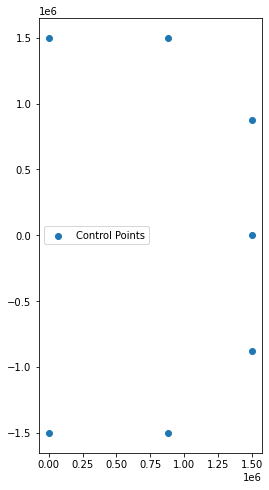

In [24]:
fig = plt.figure(figsize=(4,8))
#print(Ph[:, 0])
#plt.scatter(Ph[:, 0]*wh, Ph[:, 2]*wh)
#plt.plot(curh[:, 0], curh[:, 2], c="red", label='Curve')
plt.scatter(Ph[:, 0]/Ph[:, 3], Ph[:, 2]/Ph[:, 3], label="Control Points")
#plt.plot(Ph[:, 0]/wh, Ph[:, 2]/wh, c="green")
plt.legend()
plt.savefig('semicircle.png')

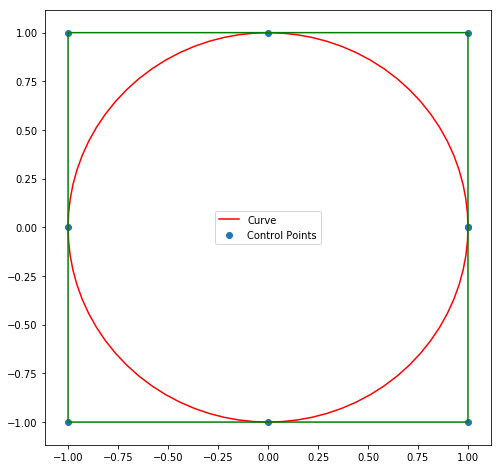

In [53]:
fig = plt.figure(figsize=(8,8))
#print(Ph[:, 0])
#plt.scatter(Ph[:, 0]*wh, Ph[:, 2]*wh)
plt.plot(curf[:, 0], curf[:, 1], c="red", label='Curve')
plt.scatter(Pf[:, 0]/wf, Pf[:, 1]/wf, label="Control Points")
plt.plot(Pf[:, 0]/wf, Pf[:, 1]/wf, c="green")
plt.legend()
plt.savefig('fullcircle.png')

IndexError: too many indices for array

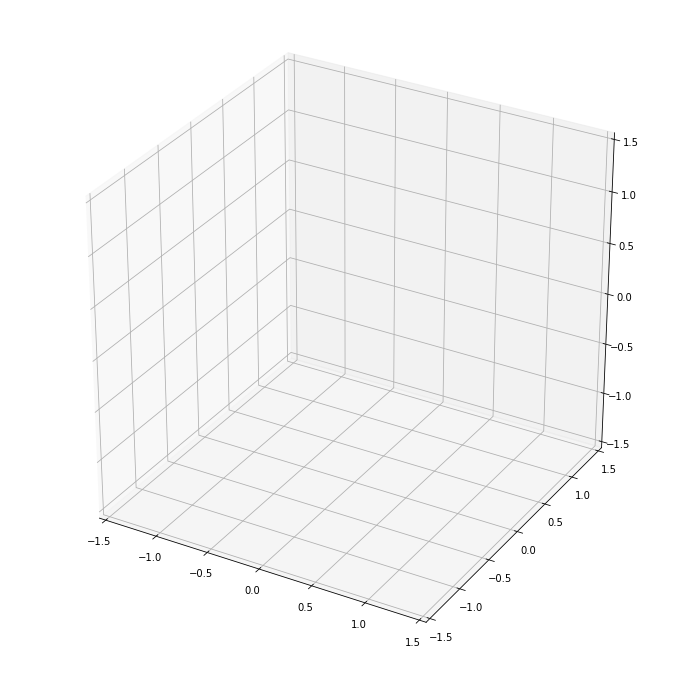

In [260]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
#print(surs[0])
#print(np.cos(320*np.pi/180))
ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(-1.5, 1.5)
#ax.scatter(Ps[:, 1::2, 1::2, 0], Ps[:, 1::2, 1::2, 1], Ps[:, 1::2, 1::2, 2])
ax.scatter(surf[:, :, 0], surf[:, :, 1], surf[:, :, 2])

In [12]:
print(vol.shape)
print(vol)
write_vtk(vol)
write_csv(vol)

NameError: name 'vol' is not defined

In [13]:
%matplotlib qt

NameError: name 'vol' is not defined

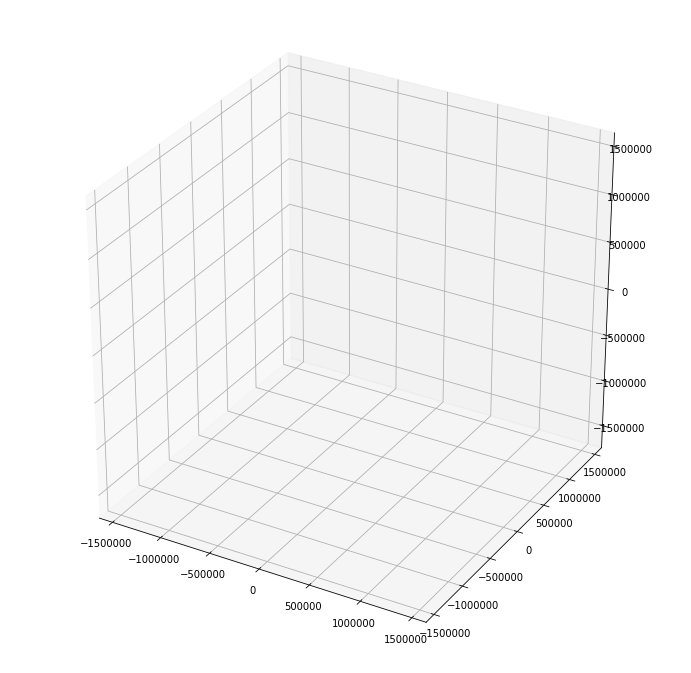

In [14]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1570900, 1570900)
ax.set_ylim3d(-1570900, 1570900)
ax.set_zlim3d(-1680900, 1570900)
vol = np.array(vol)
#print(vol[:, :, 1, 2])
for i in range(3):
    ax.plot_surface(vol[:, :, i, 0], vol[:, :,i, 1], vol[:, :,i, 2], alpha=i*0.3)

In [15]:
doc = ET.parse('output_files/30_lon_30_lat_2_layers.txt')

In [16]:
root = doc.getroot()
pointdata = doc.find('.//PointData')
points = doc.find('.//Points')

In [17]:
position = ET.tostring(points, encoding='unicode').split("\n")[2].strip().split(" ")
pos = []
for t in zip(*[iter(position)]*3):
    pos.append([float(t[0]), float(t[1]), float(t[2])])
    
#print(pos)
#pos.reverse()

#print(pos)
pos = np.array(pos)

In [18]:
#pos = np.flip(pos, 1)
datas = ET.tostring(pointdata, encoding='unicode').strip().split("\n")

In [19]:
test_data(pos)

IndexError: tuple index out of range

In [20]:
#print(datas)

comp = datas[5].strip().split(" ")
avstress = datas[8].strip().split(" ")
stressdif = datas[11].strip().split(" ")
te = np.array([[0], [1], [2]])
print(te.shape)
tension = datas[2].strip().split(" ")
tens = []
for t in tension:
    tens.append([float(t)])
tens = np.array(tens)
print(tens.shape)
data = np.append(pos, tens, axis=1)
#print(data)

(3, 1)
(182, 1)


In [21]:
data = np.reshape(data,(2, 7, 13, 4), order='C')

In [22]:
#test_data(data)

In [35]:
def output_data(data, name):
    sh = data.shape
    num = sh[0]*(sh[1]-2)*(sh[2]-1)+(sh[0]*2)
    line = "# vtk DataFile Version 2.0\n"
    line += "Unstructured Grid Example\n"
    line += "ASCII\n"
    line += "DATASET UNSTRUCTURED_GRID\n"
    line += "POINTS " + str(num) + " float\n"
    print(sh)
    ye = 0
    dat = []
    for idx, val in enumerate(data):
        for idy, x in enumerate(val):
            for idj, y in enumerate(x):
                if idj == sh[2]-1:
                    break
                line += str(y[0]) + "  " + str(y[1]) + "  " + str(y[2]) + "   "
                dat.append(np.array(y[3:]))
                ye += 1
                if idy == 0 or idy == sh[1]-1:
                    break
    cpts = (7*2*(sh[2]-1) + 9*(sh[1]-3)*(sh[2]-1))*(sh[0]-1)
    dat = np.array(dat)
    #print(dat)
    line += "\n\n";
    line += "CELLS " + str((sh[2]-1)*(sh[1]-1)*(sh[0]-1)) + " " +  str(cpts)  +"\n"
    d = 0
    #print((sh[2]-1)*(sh[1]-1)+2)
    for k in range(sh[0]-1):
        d = k * ((sh[1]-2)*(sh[2]-1)+2) 
        for j in range(sh[1]-1):
            b = 0
            if j == 0 or j == sh[1]-2:
                npts = 6
            else:
                npts = 8
            if j == 0:
                b = 1
            for i in range(sh[2]-1):
                line += str(npts) + " "
                if i == sh[2]-2:
                    z = 1
                else:
                    z = 0
                if j == 0:
                    string = str(d)+" "+str(d+((i+1)%(sh[2])))+" "+str(d+((i+2)%(sh[2]))+z)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+1)%(sh[2])))+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+2)%(sh[2]))+z)
                elif j == sh[1]-2:
                    string = str(d+sh[2]-1)+" "+str(d+((i+1)%(sh[2]))-1)+" "+str(d+((i+2)%(sh[2]))+z-1)+" "+str(d+(sh[2]-1)*(sh[1]-2)+2+sh[2]-1)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+1)%(sh[2]))-1)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+2)%(sh[2]))+z-1)
                else:
                    string = str(d+i)+" "+str(d+((i+1)%(sh[2]-1)))+" "+str(d+(sh[2]-1)+((i+1)%(sh[2]-1)))+" "+str(d+(sh[2]-1)+i)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+i)+" "+str(d+(sh[1]-2)*(sh[2]-1)+2+((i+1)%(sh[2]-1)))+" "+str(d+(sh[2]-1)+(sh[1]-2)*(sh[2]-1)+2+((i+1)%(sh[2]-1)))+" "+str(d+(sh[2]-1)+(sh[1]-2)*(sh[2]-1)+2+i)
                    b += 1
                line += string+" "
                line += "\n"
            d += b

           
            
    line += "\n"   
    line += "CELL_TYPES " + str((sh[2]-1)*(sh[1]-1)*(sh[0]-1)) + "\n"
    for k in range(sh[0]-1):
        for i in range((sh[1]-1)):
            for j in range(sh[2]-1):
                if i == 0 or i == sh[1]-2:
                    string = str(13)
                else:
                    string = str(12)
                line += string+"\n"
    
    line += "\n"
    #dat = np.reshape(dat, (sh[0]*(sh[1]-2)*(sh[2]-1)+(sh[0]*2), 1), 'C')
    #print(dat[i])
    line += "POINT_DATA " + str(num) + "\n"
    line += "SCALARS Tension float 1\n"
    line += "LOOKUP_TABLE default\n"
    for i in range(num):
        
        line += str(dat[i, 0])
        line += " "
    line += "\n"
    line += "SCALARS Compression float 1\n"
    line += "LOOKUP_TABLE default\n"
    for i in range(num):
        
        line += str(dat[i, 1])
        line += " "
    line += "\n"
    
   # line += "SCALARS Layer float 1\n"
   # line += "LOOKUP_TABLE default\n"
   # for i in range(num):
        
   #     line += str(dat[i, 2])
   #     line += " "
   # line += "\n"
    
    dat = open(name+".vtk", "w")
    dat.write(line)
    dat.close()

In [36]:
files = glob.glob('output_files/*.txt')
print(files)
print(files[1])

['output_files\\10_lon_10_lat_2_layers.txt', 'output_files\\10_lon_10_lat_3_layers.txt', 'output_files\\10_lon_10_lat_4_layers.txt', 'output_files\\12_lon_12_lat_2_lay.txt', 'output_files\\15_lon_15_lat_2_layers.txt', 'output_files\\15_lon_15_lat_3_layers.txt', 'output_files\\15_lon_15_lat_4_layers.txt', 'output_files\\18_lon_18_lat_2_lay.txt', 'output_files\\20_lon_10_lat_2_layers.txt', 'output_files\\20_lon_10_lat_3_layers.txt', 'output_files\\20_lon_10_lat_4_layers.txt', 'output_files\\30_lon_15_lat_2_layers.txt', 'output_files\\30_lon_15_lat_3_layers.txt', 'output_files\\30_lon_15_lat_4_layers.txt', 'output_files\\30_lon_30_lat_2_layers.txt', 'output_files\\30_lon_30_lat_3_layers.txt', 'output_files\\30_lon_30_lat_4_layers.txt', 'output_files\\45_lon_45_lat_2_layers.txt', 'output_files\\45_lon_45_lat_3_layers.txt', 'output_files\\45_lon_45_lat_4_layers.txt']
output_files\10_lon_10_lat_3_layers.txt


In [41]:


for f in files:
    #print(f)
    v = int(360/int(f[13:15])) + 1
    u = int(180/int(f[20:22])) + 1
    w = int(f[27])
    #print(v)
    #print(u)
    #print(w)
    doc = ET.parse(f)
    root = doc.getroot()
    pointdata = doc.find('.//PointData')
    points = doc.find('.//Points')
    position = ET.tostring(points, encoding='unicode').split("\n")[2].strip().split(" ")
    pos = []
    for t in zip(*[iter(position)]*3):
        pos.append([float(t[0]), float(t[1]), float(t[2])])
    

    pos = np.array(pos)
    
    datas = ET.tostring(pointdata, encoding='unicode').strip().split("\n")
    
    tension = datas[2].strip().split(" ")
    compression = datas[5].strip().split(" ")
    layer = datas[20].strip().split(" ")
    #print(compression)
    comp = []
    lay = []
    tens = []
    for t in tension:
        tens.append([float(t)])
        
    for c in compression:
        comp.append([float(c)])
    
    for l in layer:
        lay.append([float(l)])
    #print(comp)
    lay = np.array(lay)
    comp = np.array(comp)
    tens = np.array(tens)
    data = np.append(pos, tens, axis=1)
    data = np.append(data, comp, axis=1)
    #data = np.append(data, lay, axis=1)
    #print(data)
    print(v)
    data = np.reshape(data,(w, u, v, 5), order='C')
    if (v == 9 and w == 2):
        Cs = data
    name = "out/"+f[13:15] + "lon_" + f[20:22] + "lat_" + f[27] + "lay"
    output_data(data, name)

37
(2, 19, 37, 5)
37
(3, 19, 37, 5)
37
(4, 19, 37, 5)
31
(2, 16, 31, 5)
25
(2, 13, 25, 5)
25
(3, 13, 25, 5)
25
(4, 13, 25, 5)
21
(2, 11, 21, 5)
19
(2, 19, 19, 5)
19
(3, 19, 19, 5)
19
(4, 19, 19, 5)
13
(2, 13, 13, 5)
13
(3, 13, 13, 5)
13
(4, 13, 13, 5)
13
(2, 7, 13, 5)
13
(3, 7, 13, 5)
13
(4, 7, 13, 5)
9
(2, 5, 9, 5)
9
(3, 5, 9, 5)
9
(4, 5, 9, 5)


In [42]:
print(Cs)

[[[[ 0.00000000e+00  0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]
   [ 0.00000000e+00  0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]
   [ 0.00000000e+00  0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]
   [-0.00000000e+00  0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]
   [-0.00000000e+00  0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]
   [-0.00000000e+00 -0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]
   [-0.00000000e+00 -0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]
   [ 0.00000000e+00 -0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]
   [ 0.00000000e+00 -0.00000000e+00  1.51100000e+06  2.27104207e+03
    -2.32749376e+03]]

  [[ 1.06843835e+06  0.00000000e+00  1.06843835e+06  2.89378179e+03
    -5.34082967e+02]
   [ 7.55500000e+05  7.55500000e+05  1.06843835e+06  1.52917070e+03
    -1.72538361e+03]
   [ 0.00000000e+00

[[ 1.56080000e+06  0.00000000e+00]
 [ 1.56080156e+06  1.56080000e+06]
 [ 9.55714362e-11  1.56080000e+06]
 [-1.56080156e+06  1.56080000e+06]
 [-1.56080000e+06  1.91142872e-10]]
[0.  0.  0.  0.5 0.5 1.  1.  1. ]
[1.         0.70710678 1.         0.70710678 1.        ]
[0.0, 0.0, 0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1.0, 1.0, 1.0]
[1.0, 0.8535533900000001, 0.8535533900000001, 0.8535533900000001, 1.0, 0.8535533900000001, 0.8535533900000001, 0.8535533900000001, 1.0]


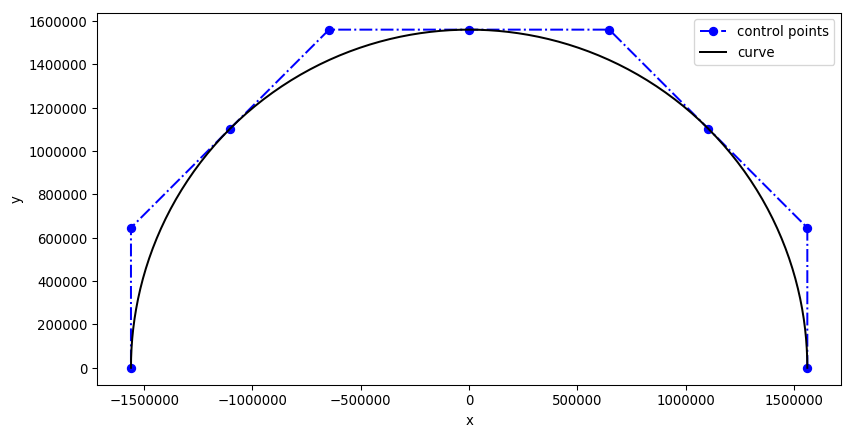

In [357]:
from geomdl import NURBS
from geomdl import utilities
from geomdl import exchange
from geomdl import operations
from geomdl.visualization import VisMPL

# Create a curve instance
curve = NURBS.Curve()
O = np.array([0, 0, 0])
X = np.array([1, 0, 0])
Y = np.array([0, 1, 0])
Z = np.array([0, 0, 1])
r = 1560800



ths = 0.
the = 180.
nf, Uf, Pf, wf = NURBSCircle(O, X, Y, r, ths, the)
curve.degree = 2

print(Pf[:, :2])
print(Uf)
print(wf)
curve.ctrlpts = [ [1.56080000e+06,  0.00000000e+00], [1.56080156e+06,  1.56080000e+06], [0,  1.56080000e+06], [-1.56080156e+06, 1.56080000e+06], [-1.56080000e+06, 0]]
curve.knotvector = [0.0, 0.0, 0.0, 0.5, 0.5, 1., 1., 1.]
curve.weights = [1., 0.70710678, 1., 0.70710678, 1.]

curve.vis = VisMPL.VisCurve2D()
operations.refine_knotvector(curve, [1])

print(curve.knotvector)
print(curve.weights)

curve.render()